# Import Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Obtain Data

Read csv with heart data into pandas

In [3]:
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Scrub data

Run df.info() to see what scrubbing is needed

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Standardize data for use in isolation forest

In [14]:
isf_df = df.drop(columns=['DEATH_EVENT'])
ss = StandardScaler()
ss.fit(isf_df)
isf_df = pd.DataFrame(ss.transform(isf_df), columns=isf_df.columns)
isf_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


Fit Isolation Forest anomoly detection model 

In [12]:
isfo = IsolationForest(contamination=.01)
if_pred = isfo.fit_predict(isf_df)
if_pred_df = pd.DataFrame(if_pred, columns=['Outlier'])
if_pred_df.head()
if_results_df = pd.merge(isf_df, if_pred_df, left_index=True, right_index=True)
if_results_df[if_results_df['Outlier']==-1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Outlier
9,1.614001,1.147968,-0.473683,-0.847579,-0.260991,1.359272,1.276539e+00,7.752020,-0.823006,0.735688,1.454161,-1.552067,-1
52,-0.070223,-0.871105,3.491573,1.179830,2.024234,-0.735688,7.535660e-09,5.234539,2.128124,-1.359272,-0.687682,-1.126175,-1
217,-0.575491,1.147968,-0.159848,-0.847579,2.701337,1.359272,-1.150731e+00,7.364715,0.085034,-1.359272,-0.687682,0.848419,-1


# Explore Data

Calculate proportion of patient deaths

In [13]:
df['DEATH_EVENT'].mean()

0.3210702341137124

Calculate descriptive statistics of features

In [15]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Plot feature distributions

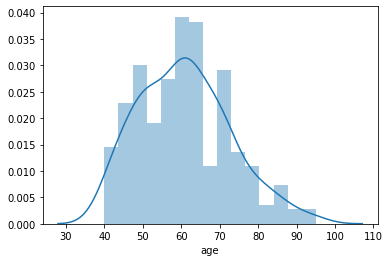

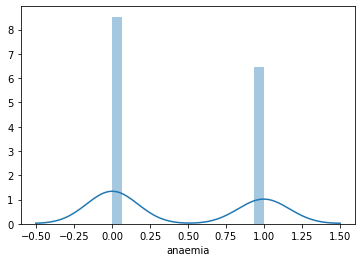

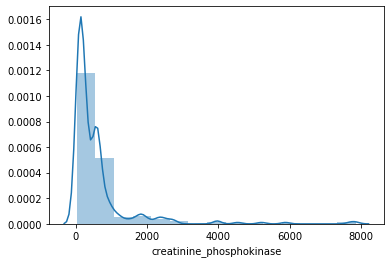

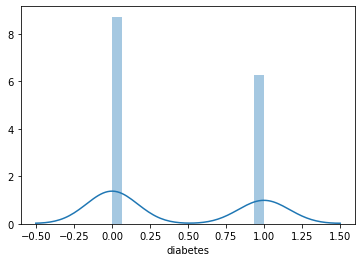

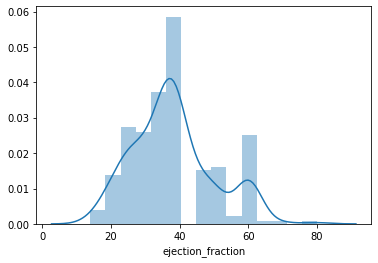

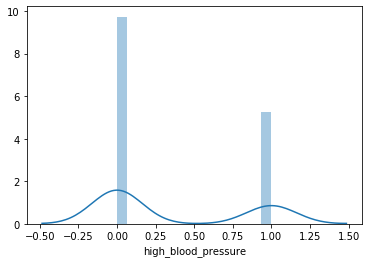

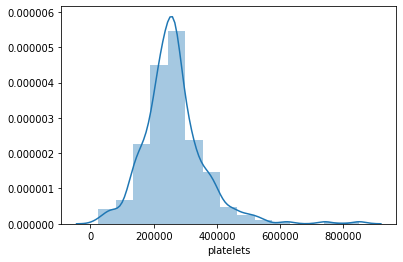

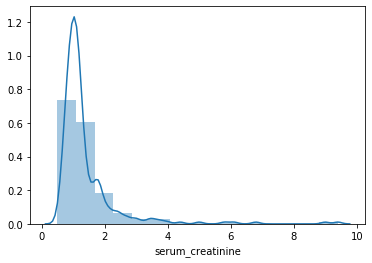

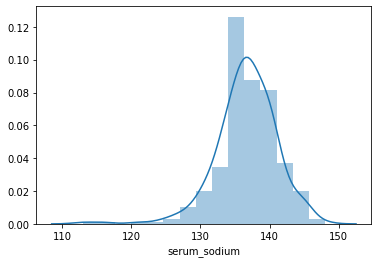

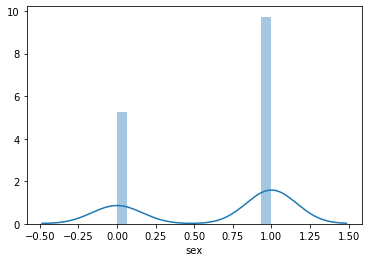

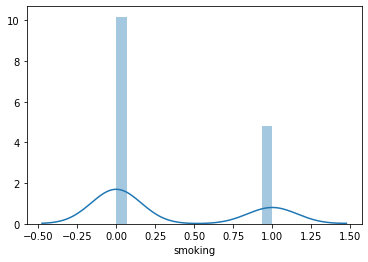

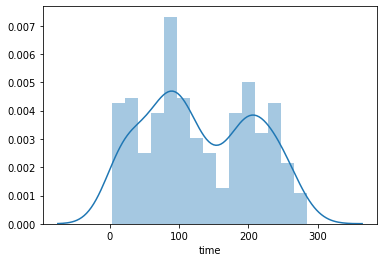

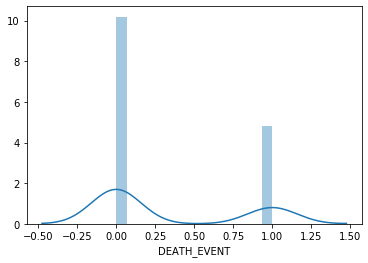

In [29]:
for feature in df.columns:
    fig, ax = plt.subplots()
    sns.distplot(df[feature], kde=True, bins=15)

Calculate feature correlations

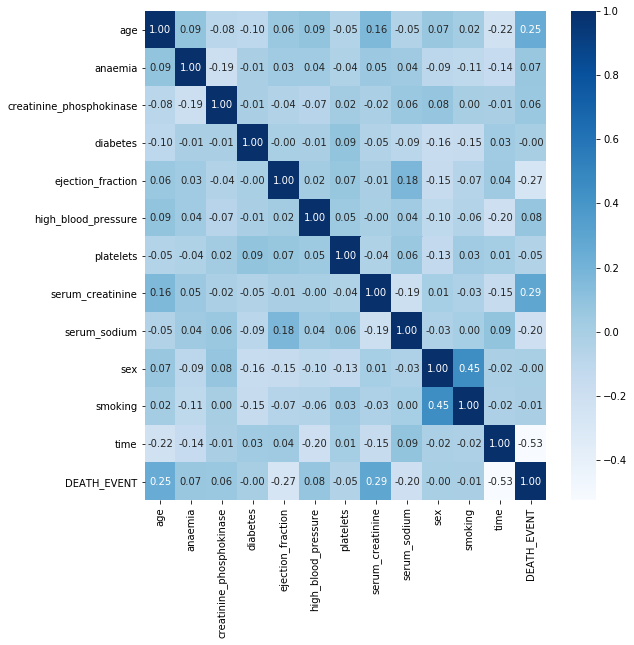

In [41]:
fig,ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f", ax=ax)

Fit a t-sne plot to the data

In [64]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=53, verbose=1)
tsne_output = tsne.fit_transform(isf_df)
tsne_df = pd.DataFrame(tsne_output, columns = ['d1', 'd2'])
tsne_df.head()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 299 samples in 0.001s...
[t-SNE] Computed neighbors for 299 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 299 / 299
[t-SNE] Mean sigma: 1.029688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.515648
[t-SNE] KL divergence after 1000 iterations: 0.816726


,d1,d2
0,29.783127,7.286383
1,4.681285,-59.101288
2,53.188793,-14.220898
3,0.152115,11.358253
4,-62.606159,8.419412


Plot tsne

Text(0.5, 1.0, 'Heart Data t-sne Plot')

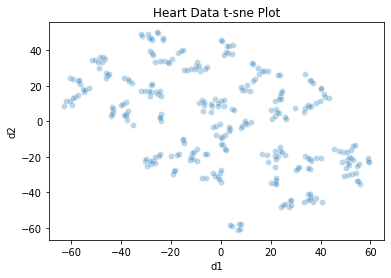

In [65]:
tsne_plot = sns.scatterplot(
    x="d1", y="d2",
    data=tsne_df,
    legend="full",
    alpha=0.3)
tsne_plot.set_title('Heart Data t-sne Plot')